## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [6]:
import pandas as pd
import numpy as np

In [7]:
# load the Titanic dataset
titanic = pd.read_csv('titanic.csv')

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Determine if the survival rate is associated to the class of passenger
Ho: The survival rate and class of passenger that are independent to each other.

Ha: The survival rate and class of passenger that are not independent to each other.

Variable	Definition	Key

survival --	Survival	0 = No, 1 = Yes

pclass  --	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

In [14]:
# import necessary libraries
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# create a 2x2 contingency table of class and survival
contingency_table = pd.crosstab(titanic['Survived'], titanic['Pclass'])

# perform the chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# print the results
print('Chi-square statistic:', chi2_stat)
print('P-value:', p_value)


Chi-square statistic: 102.88898875696056
P-value: 4.549251711298793e-23


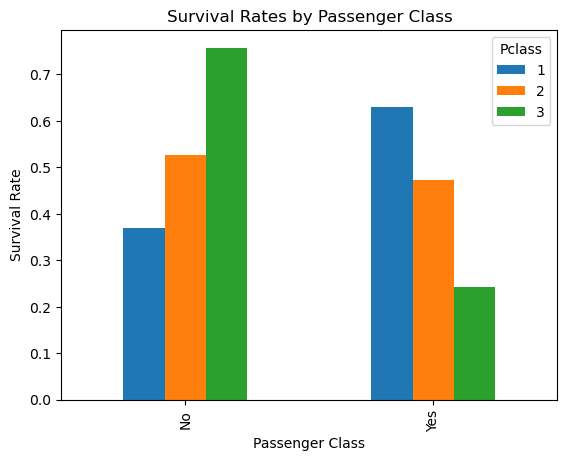

In [15]:
# Calculate the survival rates
survival_rates = contingency_table.apply(lambda x: x/x.sum(), axis=0)

# Create a bar graph
fig, ax = plt.subplots()
survival_rates.plot(kind='bar', ax=ax)

# Set the title and labels
ax.set_title('Survival Rates by Passenger Class')
ax.set_xlabel('Passenger Class')
ax.set_ylabel('Survival Rate')
ax.set_xticklabels(['No', 'Yes'])

# Show the graph
plt.show()

The p-value is less than our chosen significance level (e.g. 0.05), we can reject the null hypothesis and conclude that there is a significant association between survival rate and passenger class. If the p-value is greater than our chosen significance level, we fail to reject the null hypothesis and cannot conclude that there is an association between survival rate and passenger class.

### Determine if the survival rate is associated to the gender

Ho= Survival rate and class of passengers are independent to each other.

Ha= Survival rates and class of passengers are not independent to each other.

Variable	Definition	Key

survival --	Survival	0 = No, 1 = Yes

Chi-square statistic: 260.71702016732104
p-value: 1.1973570627755645e-58


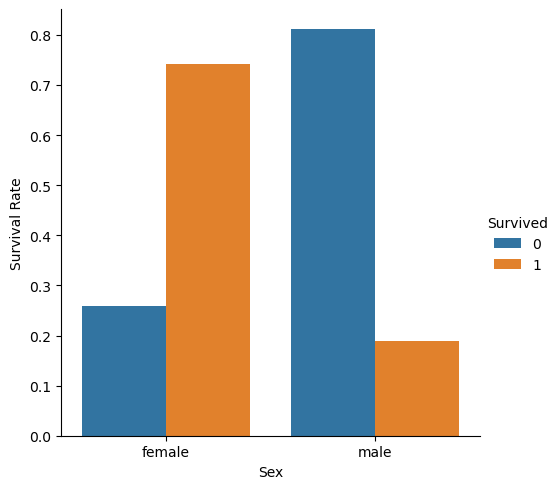

In [17]:
# Create a contingency table of gender vs. survival
cont_table = pd.crosstab(titanic['Survived'], titanic['Sex'])

# Perform the chi-square test
chi2, pval, dof, expected = chi2_contingency(cont_table)
print('Chi-square statistic:', chi2)
print('p-value:', pval)

# Group the data by gender and survival status, and calculate the mean
gender_survival_df = titanic.groupby(["Sex", "Survived"]).size().reset_index(name="Count")
gender_survival_df["Survival Rate"] = gender_survival_df.groupby("Sex").apply(lambda x: x["Count"] / x["Count"].sum()).values

# Create side-by-side bar plots
sns.catplot(x="Sex", y="Survival Rate", hue="Survived", kind="bar", data=gender_survival_df)

The p-value is less than 0.05 (assuming a significance level of 0.05), we can reject the null hypothesis that gender and survival are independent and conclude that there is an association between the two variables.

### Determine the survival rate is associated to the age

Ho = Survival rate and age of passengers are independent to each other.

Ha = Survival rates and age of passengers are not independent to each other.

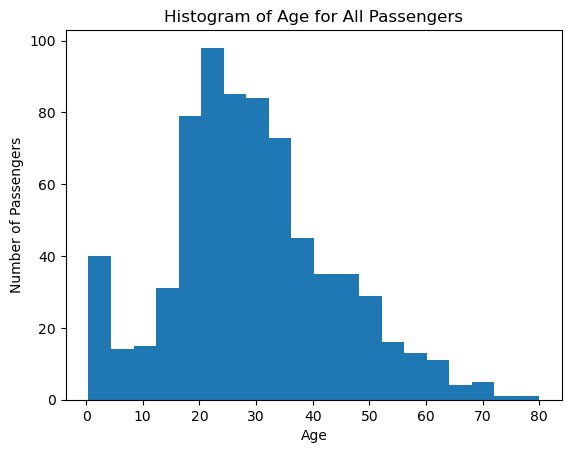

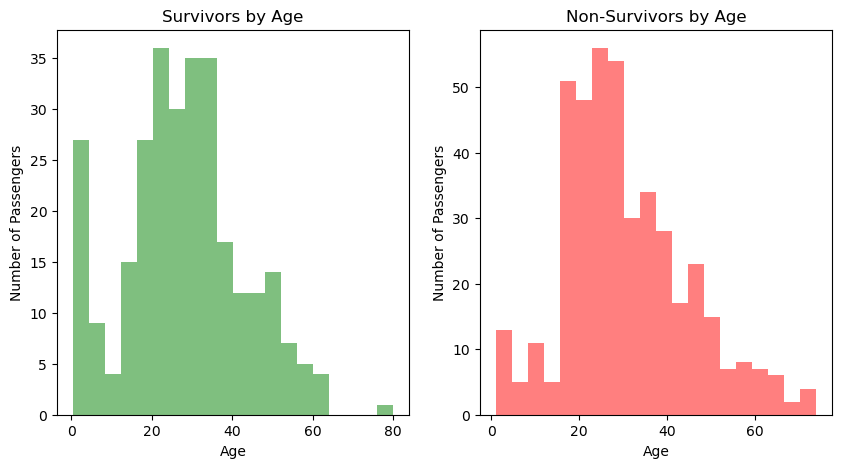

In [21]:
# Create a histogram of age for all passengers
plt.hist(titanic['Age'], bins=20)

# Add labels and title to the plot
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Histogram of Age for All Passengers')
plt.show()

# Create two separate data frames for passengers who survived and those who didn't
survived = titanic[titanic['Survived'] == 1]
not_survived = titanic[titanic['Survived'] == 0]

# Create two histograms, one for each group
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

ax1.hist(survived['Age'], bins=20, color='green', alpha=0.5)
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of Passengers')
ax1.set_title('Survivors by Age')

ax2.hist(not_survived['Age'], bins=20, color='red', alpha=0.5)
ax2.set_xlabel('Age')
ax2.set_ylabel('Number of Passengers')
ax2.set_title('Non-Survivors by Age')

plt.show()

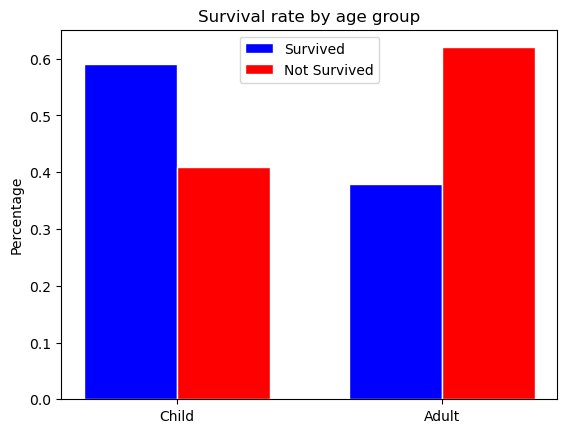

In [22]:
# Data
age_groups = ['Child', 'Adult']
survival_rate = [0.59, 0.38]
not_survived = [0.41, 0.62]

# Set up bar positions and widths
bar_width = 0.35
r1 = np.arange(len(age_groups))
r2 = [x + bar_width for x in r1]

# Create plot
fig, ax = plt.subplots()
rects1 = ax.bar(r1, survival_rate, color='b', width=bar_width, edgecolor='white', label='Survived')
rects2 = ax.bar(r2, not_survived, color='r', width=bar_width, edgecolor='white', label='Not Survived')

# Add labels, title and legend
ax.set_ylabel('Percentage')
ax.set_title('Survival rate by age group')
ax.set_xticks([r + bar_width/2 for r in range(len(age_groups))])
ax.set_xticklabels(age_groups)
ax.legend()

# Display plot
plt.show()

In [29]:
# Create age groups
age_groups = pd.cut(titanic['Age'], bins=[0, 18, 35, 50, 100],
                    labels=['Children', 'Young Adults', 'Middle-aged Adults', 'Older Adults'])

# Create contingency table
contingency_table = pd.crosstab(titanic['Survived'], age_groups)

# Perform chi-squared test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print('Chi-squared statistic:', chi2)
print('P-value:', p)

Chi-squared statistic: 7.35845688661176
P-value: 0.061309035112460046


The chi-squared statistic for this test is 7.35845688661176, and the p-value is 0.061309035112460046. Since the p-value is greater than the standard significance level of 0.05, we fail to reject the null hypothesis. Therefore, there is insufficient evidence to conclude that there is an association between survival rate and age among all subjects in the population.